In [21]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

In [2]:
margin_data = pd.read_csv("data-5vPn3.csv")

# Add a column to the data containing the Democrat vote percentage
margin_data["Dem %"] = margin_data[margin_data["Obama %"].isna()]["Clinton %"]/(margin_data[margin_data["Obama %"].isna()]["Clinton %"] + margin_data[margin_data["Obama %"].isna()]["Trump %"])
margin_data["Dem %"] = (margin_data["Clinton %"] + margin_data["Obama %"])/(margin_data["Clinton %"] + margin_data["Obama %"] + margin_data["Trump %"] + margin_data["Romney %"])

In [3]:
states = sorted(list(set([dist_id[:2] for dist_id in margin_data["Dist"]])))

In [4]:
def total_seats(state):
    state_data = margin_data[margin_data["Dist"].str.slice(0, 2) == state]
    return len(state_data)

def seats_proportional(state):
    state_data = margin_data[margin_data["Dist"].str.slice(0, 2) == state]
    return np.sum(state_data["Dem %"])

def seats_expected(state):
    state_data = margin_data[margin_data["Dist"].str.slice(0, 2) == state]
    return np.sum(st.norm.cdf(19*(state_data["Dem %"]-0.5)))

def gerry_score(state):
    return (seats_expected(state)-seats_proportional(state))/total_seats(state)

In [5]:
states_ = pd.Series(states, name="State")
seats_count = pd.Series([total_seats(state) for state in states], name = "Total Seats")
seats_pro = pd.Series([seats_proportional(state) for state in states], name = "Proportional Dem Seats")
seats_exp = pd.Series([seats_expected(state) for state in states], name = "Expected Dem Seats")

states_data = pd.concat([states_, seats_count, seats_pro, seats_exp], axis=1)
states_data["Gerry Score"] = (states_data["Expected Dem Seats"] - states_data["Proportional Dem Seats"])/states_data["Total Seats"]
states_data.sort_values("Gerry Score")

C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,State,Total Seats,Proportional Dem Seats,Expected Dem Seats,Gerry Score
25,MT,1,0.409524,0.042803,-0.366721
40,SD,1,0.374869,0.008716,-0.366154
0,AK,1,0.421798,0.068662,-0.353136
27,ND,1,0.352030,0.002466,-0.349564
2,AR,4,1.462070,0.135595,-0.331619
12,ID,2,0.655901,0.001922,-0.326990
48,WV,3,0.960862,0.002440,-0.319474
35,OK,5,1.600433,0.059448,-0.308197
43,UT,4,1.225824,0.009032,-0.304198
15,KS,4,1.529300,0.402175,-0.281781


In [6]:
state_data = margin_data[margin_data["Dist"].str.slice(0, 2) == "AL"]
state_data

,Dist,Incumbent,PVI,Clinton %,Trump %,Obama %,Romney %,Dem %
0,AL-01,Bradley Byrne (R),R+15,33.8,63.0,37.3,61.7,0.363126
1,AL-02,Martha Roby (R),R+16,32.8,64.5,36.4,62.8,0.352163
2,AL-03,Mike Rogers (R),R+16,31.9,64.8,36.7,62.2,0.350716
3,AL-04,Robert Aderholt (R),R+30,17.3,79.8,23.9,74.7,0.210526
4,AL-05,Mo Brooks (R),R+18,30.9,63.7,34.8,63.7,0.340238
5,AL-06,Gary Palmer (R),R+26,25.8,69.6,24.6,74.3,0.259393
6,AL-07,Terri Sewell (D),D+20,69.5,28.3,72.5,27.0,0.719716


In [57]:
state_data = margin_data[margin_data["Dist"].str.slice(0, 2) == "UT"]
v = np.array(state_data["Romney %"]/100)
v

array([0.775, 0.684, 0.786, 0.676])

In [59]:
dem = np.array([0.251765, 0.349261, 0.254298, 0.370501])
v_utah = np.sort(v)
v_utah

array([0.676, 0.684, 0.775, 0.786])

In [7]:
st.norm.cdf(19*(0.55-0.5))

0.8289438736915185

In [8]:
st.norm.cdf(19*(state_data["Dem %"]-0.5))

array([4.65287006e-03, 2.48550907e-03, 2.28125735e-03, 1.89895625e-08,
       1.20079025e-03, 2.42077743e-06, 9.99985075e-01])

In [9]:
total_seats("AL"), seats_proportional("AL"), seats_expected("AL")

(7, 2.595877629015181, 1.010607941457292)

In [10]:
margin_data["Dist"] == "FL"

0      False
1      False
2      False
3      False
4      False
       ...  
430    False
431    False
432    False
433    False
434    False
Name: Dist, Length: 435, dtype: bool

In [11]:
margin_data[margin_data["Obama %"].isna()]

,Dist,Incumbent,PVI,Clinton %,Trump %,Obama %,Romney %,Dem %
87,FL-01,Matt Gaetz (R),R+22,28.2,67.5,NaN,NaN,NaN
88,FL-02,Neal Dunn (R),R+18,30.6,66.2,NaN,NaN,NaN
89,FL-03,Ted Yoho (R),R+9,40.2,56.2,NaN,NaN,NaN
90,FL-04,John Rutherford (R),R+17,34.1,62.1,NaN,NaN,NaN
91,FL-05,Al Lawson (D),D+12,61.3,35.9,NaN,NaN,NaN
92,FL-06,Michael Waltz (R),R+7,39.9,56.9,NaN,NaN,NaN
93,FL-07,Stephanie Murphy (D),EVEN,51.4,44.1,NaN,NaN,NaN
94,FL-08,Bill Posey (R),R+11,37.7,58.4,NaN,NaN,NaN
95,FL-09,Darren Soto (D),D+5,54.8,41.9,NaN,NaN,NaN
96,FL-10,Val Demings (D),D+11,61.8,34.9,NaN,NaN,NaN


In [44]:
def generate_seats_votes(v, save=False, savetitle=None):
    vbar = np.mean(v)
    s = np.vectorize(lambda k: np.count_nonzero(v-vbar+k > 1/2))
    
    domain = np.linspace(0, 1, 400)
    
    plt.plot(domain, s(domain), label="Seats-Votes Curve")
    plt.scatter(vbar, s(vbar), label="Actual")
    plt.scatter(1/2, 1/2*len(v), label="Center Point")
    plt.plot((0, 1), (0, len(v)), label="Perfect Proportionality")
    plt.title("Seats-Votes Curve")
    plt.xlabel(r'$k$, Uniform Partisan Swing')
    plt.ylabel(r'$S$, R Seats Won')
    plt.legend(loc="upper left")
    
    if save: plt.savefig(savetitle+'.png')
    plt.show()
    

In [63]:
np.mean(v)

0.7302500000000001

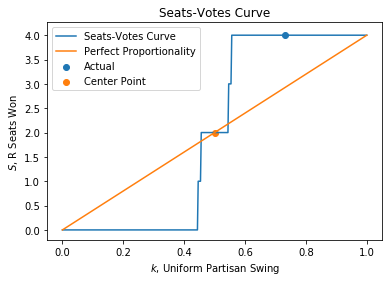

In [62]:
generate_seats_votes(v, save=True, savetitle="seats_votes_utah2012")

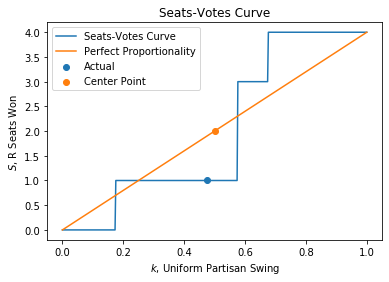

In [46]:
generate_seats_votes([0.3, 0.4, 0.4, 0.8], save=True, savetitle="seats_votes1")

In [47]:
np.mean([0.3, 0.4, 0.4, 0.8])

0.47500000000000003

In [69]:
nc2014 = np.sort(np.array([0.2662, 0.5127, 0.6781, 0.2403, 0.5704, 0.5652, 0.5935, 0.5535, 0.9390, 0.6102, 0.6290, 0.2465, 0.5731]))

In [70]:
len(nc2014)

13

In [74]:
s = np.count_nonzero(nc2014 > 1/2)
s

10

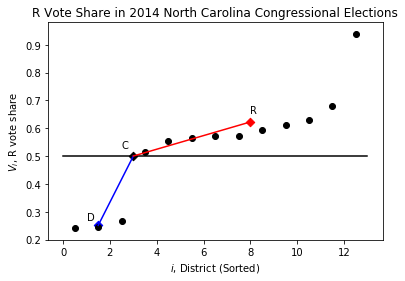

In [133]:
m = len(nc2014)
s = np.count_nonzero(nc2014 > 1/2)
mask_R = np.nonzero(nc2014 > 1/2)
mask_D = np.nonzero(nc2014 < 1/2)
rbar = (1/s)*np.sum(nc2014[mask_R])
dbar = (1/(m-s))*np.sum(nc2014[mask_D])
plt.plot([0, 13], [1/2, 1/2], c="black")

plt.scatter(m*((m-s)/(2*m)), dbar, c="blue", marker="D")
plt.scatter(m*((m-s)/m), 1/2, c="black", marker="D")
plt.scatter(m*((2*m-s)/(2*m)), rbar, c="red", marker="D")
plt.plot([m*((m-s)/(2*m)), m*((m-s)/m)], [dbar, 1/2], c="blue")
plt.plot([m*((m-s)/m), m*((2*m-s)/(2*m))], [1/2, rbar], c="red")
plt.scatter(1/2 + np.arange(m), nc2014, c="black")
plt.xlabel(r"$i$, District (Sorted)")
plt.ylabel(r"$V_i$, R vote share")
plt.title("R Vote Share in 2014 North Carolina Congressional Elections")
plt.text(m*((m-s)/(2*m))-0.5, dbar+0.02, 'D')
plt.text(m*((m-s)/m)-0.5, 1/2+0.03, 'C')
plt.text(m*((2*m-s)/(2*m)), rbar+0.03, 'R')
plt.show()

theta_D = np.arctan((1-2*dbar)/((m-s)/m))
theta_R = np.arctan((2*rbar-1)/(s/m))

declination = (2/np.pi)*(theta_R - theta_D)

In [100]:
declination

-0.5274972219674893

In [92]:
np.arctan

<ufunc 'arctan'>

In [109]:
plt.text?